In [1]:
import sys
sys.path.append('../src')

In [2]:
import os
from dotenv import load_dotenv

In [3]:
from data.handler import load_and_transform_data, get_data_loader
from vizualization.tensors import imshow
import torchvision

In [4]:
load_dotenv()

True

In [5]:
# dataset_name = 'imagenet-1k' . v big and long :( 
# Hugging face stores downloads at ~/.cache/huggingface/datasets by default 

dataset_name = 'cifar10'
batch_size = 32
cache_dir = os.getenv("CACHE_DIR")

In [6]:
dataset = load_and_transform_data(dataset_name, augment=False, download_dir=cache_dir)
dataset.__getitem__(100)

(tensor([[[-1.9467, -1.9467, -1.9467,  ..., -1.7583, -1.7583, -1.7583],
          [-1.9467, -1.9467, -1.9467,  ..., -1.7583, -1.7583, -1.7583],
          [-1.9467, -1.9467, -1.9467,  ..., -1.7583, -1.7583, -1.7583],
          ...,
          [-1.4500, -1.4500, -1.4500,  ...,  0.4851,  0.4851,  0.4851],
          [-1.4500, -1.4500, -1.4500,  ...,  0.4851,  0.4851,  0.4851],
          [-1.4500, -1.4500, -1.4500,  ...,  0.4851,  0.4851,  0.4851]],
 
         [[-1.7906, -1.7906, -1.7906,  ..., -1.3004, -1.3004, -1.3004],
          [-1.7906, -1.7906, -1.7906,  ..., -1.3004, -1.3004, -1.3004],
          [-1.7906, -1.7906, -1.7906,  ..., -1.3004, -1.3004, -1.3004],
          ...,
          [-0.7052, -0.7052, -0.7052,  ...,  0.5728,  0.5728,  0.5728],
          [-0.7052, -0.7052, -0.7052,  ...,  0.5728,  0.5728,  0.5728],
          [-0.7052, -0.7052, -0.7052,  ...,  0.5728,  0.5728,  0.5728]],
 
         [[-1.5779, -1.5779, -1.5779,  ..., -1.3513, -1.3513, -1.3513],
          [-1.5779, -1.5779,

In [7]:
train_dataloader = get_data_loader(dataset, batch_size, shuffle=True)

In [8]:
train_dataloader.__len__()

1563

torch.Size([32, 3, 224, 224])


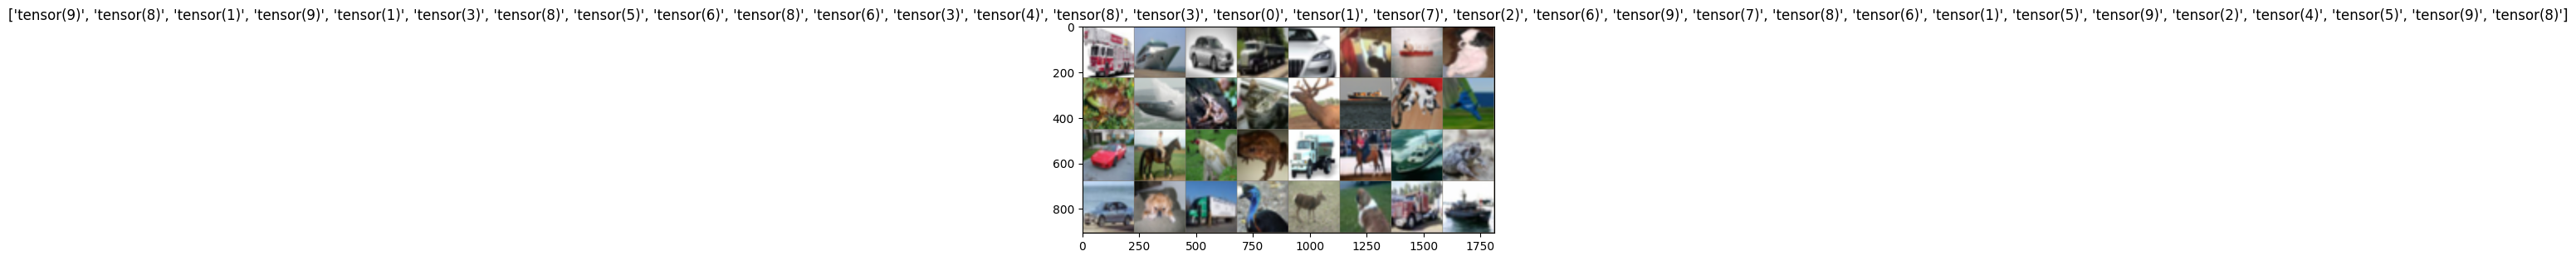

In [9]:
train_features, train_labels = next(iter(train_dataloader))
print(train_features.shape)
out = torchvision.utils.make_grid(train_features)
imshow(out, title=[str(x) for x in train_labels])